In [1]:
import sys, traceback
import pandas as pd
from datetime import datetime
from pandas_datareader import data as pdr
import numpy as np
from sklearn.model_selection import train_test_split


%matplotlib inline

In [2]:
start = pd.to_datetime('01/01/2012').tz_localize('US/Eastern')
end = pd.to_datetime('12/31/2013').tz_localize('US/Eastern')

In [3]:
data = pdr.get_data_yahoo('AAPL',start,end)

In [4]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,39.172771
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,39.383293
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,39.820515
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,40.236809
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,40.172970


In [5]:
prices = pd.DataFrame(index = data.index)
prices['Adj Close'] = data['Adj Close']

In [6]:
prices.head()

,Adj Close
Date,
2012-01-03,39.172771
2012-01-04,39.383293
2012-01-05,39.820515
2012-01-06,40.236809
2012-01-09,40.172970


In [7]:
# Momentum
window = int(5)
momentum = []
price_array = pd.DataFrame.as_matrix(prices)
for i in range(prices.shape[0]):
    if  i > window:
        momentum_value = (price_array[i]/price_array[i-window]) - 1.0
        momentum.append(momentum_value)
pmomentum_value = prices.copy()
pmomentum_value[:] = 0.0
norm_momentum = (momentum-np.mean(momentum))/np.std(momentum)
pmomentum_value.iloc[window+1:,:] = norm_momentum
pmomentum_value.ix[:window,:] = norm_momentum[5,0]

C:\New folder\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\New folder\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


In [8]:
pmomentum_value.head()

,Adj Close
Date,
2012-01-03,0.144136
2012-01-04,0.144136
2012-01-05,0.144136
2012-01-06,0.144136
2012-01-09,0.144136


In [9]:
pmomentum_value = pmomentum_value.rename(columns= {'Adj Close' : 'Momentum'})

In [10]:
pmomentum_value.head()

,Momentum
Date,
2012-01-03,0.144136
2012-01-04,0.144136
2012-01-05,0.144136
2012-01-06,0.144136
2012-01-09,0.144136


In [11]:
data['return'] = 0

In [12]:
N = 5
for i in range (0, data.shape[0]-5):
    data.iloc[i,6] = (data.iloc[i+N,5]/data.iloc[i,5]) - 1
        

In [13]:
data['return'].mean()

0.00622951555547203

In [14]:
data['return'].max()

0.13089780361690084

In [15]:
data['return'].min()

-0.12493044397265274

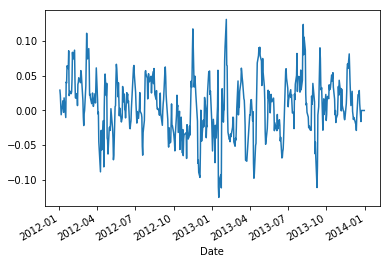

In [16]:
data['return'].plot()

In [17]:
Y_buy = (data['return'].mean() + data['return'].max())/2

In [18]:
Y_sell = (data['return'].mean() + data['return'].min())/2

In [19]:
data['Label'] = data['return'].apply(lambda x: '-1' if x < Y_sell else '1' if x > Y_buy else '0')

In [20]:
data.head()

,High,Low,Open,Close,Volume,Adj Close,return,Label
Date,,,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,39.172771,0.029205,0
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,39.383293,0.022034,0
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,39.820515,0.008038,0
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,40.236809,-0.006132,0
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,40.172970,0.007043,0


In [21]:
data['5 day MA'] = data['Adj Close'].rolling(window = 5).mean()

In [22]:
data['5 day STD'] = data['Adj Close'].rolling(window = 5).std()

In [23]:
data['Upper Band'] = data['5 day MA'] + (data['5 day STD']*2)

In [24]:
data['Lower Band'] = data['5 day MA'] - (data['5 day STD']*2)

In [25]:
data.head()

,High,Low,Open,Close,Volume,Adj Close,return,Label,5 day MA,5 day STD,Upper Band,Lower Band
Date,,,,,,,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,39.172771,0.029205,0,NaN,NaN,NaN,NaN
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,39.383293,0.022034,0,NaN,NaN,NaN,NaN
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,39.820515,0.008038,0,NaN,NaN,NaN,NaN
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,40.236809,-0.006132,0,NaN,NaN,NaN,NaN
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,40.172970,0.007043,0,39.757272,0.471238,40.699748,38.814796


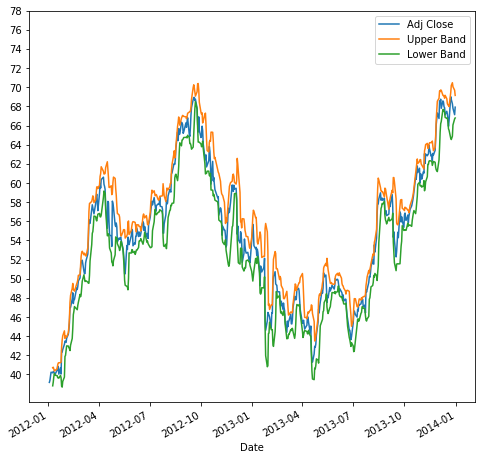

In [26]:
data[['Adj Close', 'Upper Band', 'Lower Band']].plot(figsize = (8,8), yticks = range(40, 80,2))

In [27]:
#Bollinger Bands
bollinger = pd.DataFrame(index = data.index)

In [28]:
bollinger['BB_bands'] = data['Lower Band']/data['Upper Band']

In [29]:
bollinger.head(20)

,BB_bands
Date,
2012-01-03,NaN
2012-01-04,NaN
2012-01-05,NaN
2012-01-06,NaN
2012-01-09,0.953686
2012-01-10,0.962057
2012-01-11,0.980633
2012-01-12,0.993157
2012-01-13,0.987752


In [30]:
#SMA
SMA = pd.DataFrame(index = data.index)
SMA['SMA'] = data['5 day MA']/data['Adj Close']

In [31]:
SMA.head(20)

,SMA
Date,
2012-01-03,NaN
2012-01-04,NaN
2012-01-05,NaN
2012-01-06,NaN
2012-01-09,0.989652
2012-01-10,0.991797
2012-01-11,0.997728
2012-01-12,1.002069
2012-01-13,1.004606


In [32]:
X_data = pd.concat([prices, pmomentum_value, bollinger, SMA], axis=1)

In [33]:
X_data.head()

,Adj Close,Momentum,BB_bands,SMA
Date,,,,
2012-01-03,39.172771,0.144136,NaN,NaN
2012-01-04,39.383293,0.144136,NaN,NaN
2012-01-05,39.820515,0.144136,NaN,NaN
2012-01-06,40.236809,0.144136,NaN,NaN
2012-01-09,40.172970,0.144136,0.953686,0.989652


In [34]:
X_data = X_data.fillna(0)

In [35]:
X_data.head()

,Adj Close,Momentum,BB_bands,SMA
Date,,,,
2012-01-03,39.172771,0.144136,0.000000,0.000000
2012-01-04,39.383293,0.144136,0.000000,0.000000
2012-01-05,39.820515,0.144136,0.000000,0.000000
2012-01-06,40.236809,0.144136,0.000000,0.000000
2012-01-09,40.172970,0.144136,0.953686,0.989652


In [36]:
Y_data = data['Label']

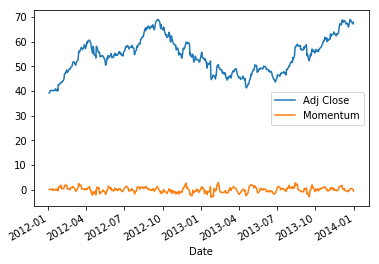

In [37]:
X_data[['Adj Close', 'Momentum']].plot()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2)

### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf=RandomForestClassifier(n_estimators=100, min_samples_leaf = 7)

In [40]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=7, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [41]:
y_pred=clf.predict(X_test)

In [42]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8712871287128713


### Linear Regresstion

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
log_reg = LogisticRegression(multi_class='auto')

In [45]:
log_reg.fit(X_train, y_train)

C:\New folder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
Y_pred_lg = log_reg.predict(X_test)

In [47]:
print(metrics.accuracy_score(y_test, Y_pred_lg))

0.8712871287128713


### KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 

In [49]:
knn_predictions = knn.predict(X_test) 

In [50]:
accuracy = knn.score(X_test, y_test)

In [51]:
accuracy

0.8811881188118812

### SVM

In [52]:
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 

In [53]:
accuracy = svm_model_linear.score(X_test, y_test) 

In [54]:
accuracy

0.8712871287128713

### Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test)

In [56]:
accuracy = gnb.score(X_test, y_test) 

In [57]:
accuracy

0.4752475247524752

In [58]:
Y_buy

0.06856365958618643

In [59]:
Y_sell

-0.05935046420859035